<center><h1> Predicting the popularity of songs based on Spotify metrics</h1></center>

Using a dataset of 200,000 tracks downloaded through the spotify api, we wanted to discover weather or not we are able to predict what variable affect a songs popularity, 
and in trun using either linear regression or polynomial regression are able to predict whether or not a song will become a hit.

In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spotify_songs as ss

As part of our cleaning, we need to get rid of certain tracks that were adding extra noise to our initial analysis, these tracks included meditation track, white noise and signal generators.
As we are looking to predict for pop songs we and other major geres categories, We also removed certain genres that are not relavent to our study, these include classical and world music genres.

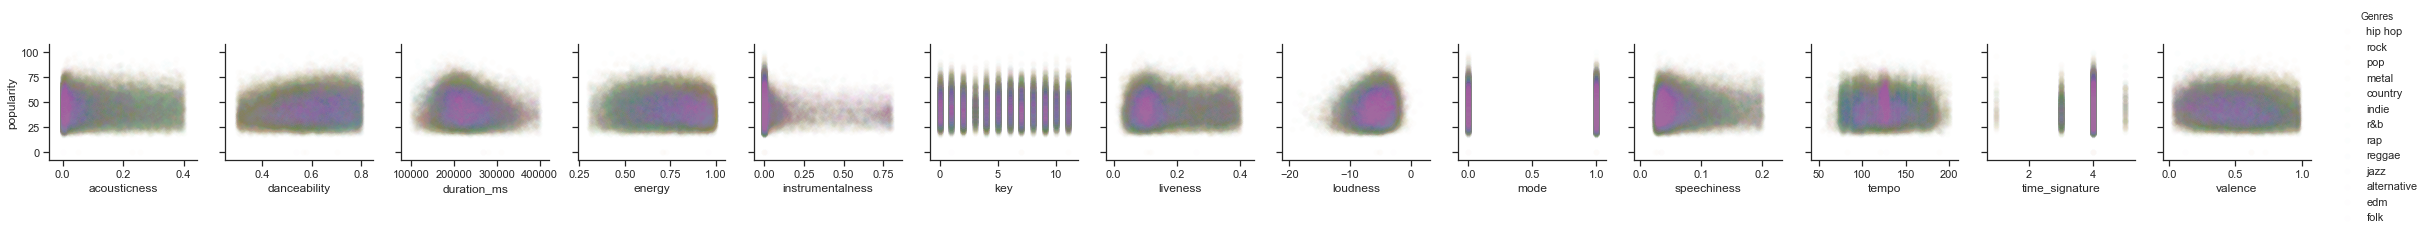

In [22]:
df = ss.clean_n_plot('tracks2.csv')

In [23]:
df.head()

,artist_name,release_date,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,...,loudness,mode,speechiness,tempo,time_signature,valence,Genres,subgenres,popularity_artist,year
0,TLC,1999-02-23,No Scrubs,81,0.0251,0.743,214400,0.675,0.000717,8,...,-4.267,0,0.0953,92.909,4,0.590,hip hop,atl hip hop,73,1999
2,Smash Mouth,1999-01-01,All Star,81,0.0319,0.731,200373,0.861,0.000000,11,...,-5.881,1,0.0323,104.034,4,0.780,rock,alternative rock,71,1999
3,Destiny's Child,1999-07-27,Say My Name,78,0.2730,0.713,271333,0.678,0.000000,5,...,-3.525,0,0.1020,138.009,4,0.734,pop,dance pop,76,1999
4,Red Hot Chili Peppers,1999-06-08,Californication,82,0.0021,0.592,329733,0.767,0.001650,9,...,-2.788,0,0.0270,96.483,4,0.328,rock,alternative rock,86,1999
5,blink-182,1999-06-01,What's My Age Again?,77,0.0126,0.391,148360,0.951,0.000378,6,...,-7.419,1,0.0692,157.660,4,0.468,rock,pop punk,83,1999


As we can see from the above pair plot, there is very little correlation between the popularity of a song and the other variables. We decided to tackle this problem bottom up; starting with sub genres, 
where musical trends tend to be quite narrow. However we encountered a problem, the number of datapoints available for the subgeneres where quite small, making overfitting a real issue for polynomial regression.
On the linear regression, the results are not bad but we really don't have enough point to create a test train model to validate the result.

In [29]:
sub_df = ss.sub_genres_regression(df)
sub_df.head(10)

,sub,lin_mse,lin_r2,poly_mse,poly_r2,no_rows
53,jazz saxophone,24.262112,0.375359,2.925230e-16,1.0,34
132,mexican pop punk,19.710132,0.549905,6.665362e-16,1.0,35
140,alberta country,43.355964,0.577778,7.382038e-16,1.0,41
201,electro house,44.786946,0.717181,7.978591e-15,1.0,35
69,classic italian pop,61.540224,0.462714,2.197151e-18,1.0,31
203,future funk,19.149127,0.390931,2.324648e-16,1.0,45
88,hardcore,16.517519,0.689926,5.599923e-16,1.0,37
174,australian hip hop,47.261543,0.360154,1.809917e-15,1.0,42
96,afghan pop,23.573210,0.372403,9.082233e-21,1.0,33
93,christian punk,37.372578,0.446486,2.422649e-15,1.0,39


Next stup up was by genres, this gave us slightly better results, especially with rap were our test r2 was very close to our train model at roughly 0.40. In general however the model is not very strong as with most genres there is wide range of music that is produced.

In [34]:
genres_reg = ss.genres_regression(df)
genres_reg

,genres,lin_train_mse,lin_test_mse,lin_r2,lin_test_r2,poly_mse,test_mse,poly_r2,test_poly_r2
7,rap,108.274259,108.166315,0.377743,0.388960,94.014777,108.166315,0.459693,0.401466
11,edm,93.679935,100.833025,0.334453,0.329323,82.449667,100.833025,0.414238,0.344331
0,hip hop,130.335753,130.247358,0.273583,0.265256,119.912186,130.247358,0.331678,0.257997
6,r&b,107.689442,130.050462,0.380412,0.340285,104.963996,130.050462,0.396093,0.250596
2,pop,135.727368,131.024886,0.224507,0.218118,131.919561,131.024886,0.246264,0.230452
3,metal,93.665194,87.402356,0.194839,0.199596,89.078852,87.402356,0.234264,0.230286
4,country,131.487849,134.052844,0.182822,0.183073,120.724259,134.052844,0.249716,0.213753
1,rock,113.634359,106.974171,0.158831,0.141324,106.163680,106.974171,0.214132,0.163737
10,alternative,83.181637,83.648094,0.182100,0.192306,77.243530,83.648094,0.240488,0.154775
5,indie,97.440913,118.867878,0.186428,0.153221,101.236556,118.867878,0.154737,-0.071593


To narrow it down even further we decided to look at each genres year by year and see if yearly trends could be a predictor. This however was not the case, this could most probaly be due to fewer points of analysis.

In [89]:
year_genres_reg = ss.genres_by_year_reg(df)
year_genres_reg.head(10)

,year,genres,lin_train_mse,lin_test_mse,lin_r2,lin_test_r2,poly_mse,test_mse,poly_r2,test_poly_r2
142,2018,pop,52.903743,57.019409,0.253634,0.218482,43.804276,57.019409,0.382009,0.117779
11,2001,metal,115.453343,192.161653,0.218271,0.211946,89.486520,192.161653,0.394091,0.002493
39,2006,rock,91.711362,119.282539,0.183191,0.169330,66.335307,119.282539,0.409198,-0.015842
3,1999,metal,94.695424,167.266054,0.214866,0.277767,63.301129,167.266054,0.475161,-0.016667
102,2014,pop,74.422688,82.509144,0.134197,0.122725,65.210377,82.509144,0.241369,-0.048605
92,2013,pop,77.622257,92.570019,0.172674,0.176136,64.316884,92.570019,0.314487,-0.077952
84,2012,pop,88.047274,118.426069,0.186157,0.127120,72.246890,118.426069,0.332204,-0.122128
132,2017,pop,51.450971,80.773169,0.187972,0.130980,48.253839,80.773169,0.238431,-0.165097
35,2005,metal,88.990197,152.246767,0.231579,0.137005,67.701926,152.246767,0.415401,-0.171773
122,2016,pop,55.482429,83.387603,0.190843,0.135759,45.847260,83.387603,0.331363,-0.182692


In [ ]:
###################
# WARNING- This line of code takes around an hour to complete we recomend using the csv file in the block below
###################


# var_sampling = ss.variable_distributions(df)

Looking at trends within each variable as a method of predicting popular songs.

In [46]:
var_sampling = pd.read_csv('variable_means.csv')
var_sampling.head()

,acousticness,year,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0.308769,1999,0.565843,246149.162,0.602746,0.122012,0.219174,-9.293665,0.095044,119.505726,0.532217
1,0.358292,1999,0.563955,245970.536,0.603235,0.147515,0.217576,-9.237591,0.094960,118.593950,0.538590
2,0.318882,1999,0.563809,255353.439,0.601207,0.132539,0.230880,-8.909014,0.092368,117.810058,0.551454
3,0.332034,1999,0.557026,242429.046,0.600825,0.115970,0.214566,-9.164172,0.096235,117.976322,0.532405
4,0.317997,1999,0.557138,246271.545,0.605645,0.133790,0.214000,-9.235918,0.097540,119.626304,0.546316


In [81]:
vars_df = var_sampling.groupby('year').mean()
vars_df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
year,,,,,,,,,,
1999,0.328933,0.565213,247258.806617,0.602672,0.136933,0.218696,-9.149962,0.094308,119.018282,0.540262
2000,0.320972,0.563185,245415.224495,0.607591,0.139086,0.212940,-8.985725,0.091985,119.023304,0.529721
2001,0.319155,0.559102,241900.614597,0.613062,0.134024,0.208048,-8.710771,0.088783,118.000975,0.526108
2002,0.313655,0.558026,244604.358884,0.616419,0.125128,0.213614,-8.483621,0.086409,118.919736,0.523965
2003,0.298756,0.553004,244474.243331,0.635941,0.115445,0.217739,-8.202626,0.098951,120.083557,0.510873


In [82]:
df_mean_year_sub = vars_df[['acousticness', 'danceability', 'energy', 'valence']]

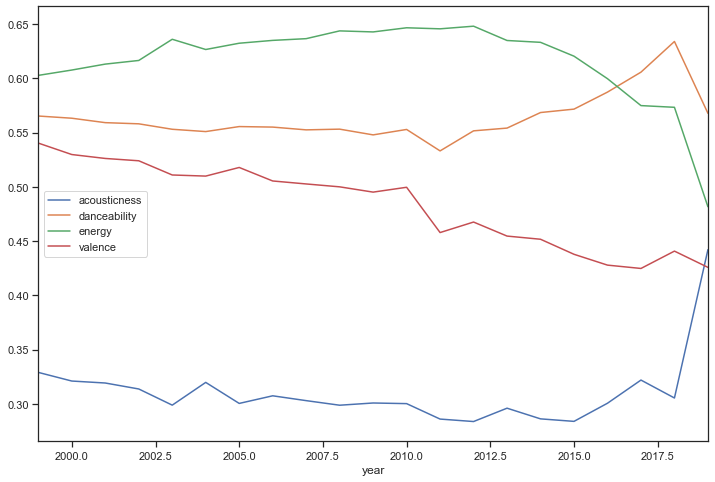

In [83]:
df_mean_year_sub.plot(figsize = (12,8))

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'mode', 'speechiness',
       'tempo', 'valence', 'popularity_artist'],
      dtype='object')


array([ 1.25183529e+01, -1.15453462e+01, -6.13375479e-05, -6.51802777e+00,
       -7.57379141e-01, -6.18874397e+00,  2.89919027e-01, -7.78839965e-01,
       -1.60091597e+01,  2.01908207e-02, -6.16019617e+00,  3.97667392e-01])